## DATA PREPROCESSING

In [1]:
import pandas as pd

In [2]:
housingdata = pd.read_csv("housingdata.csv")

In [3]:
housingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      503 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      503 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        503 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
housingdata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### DATA CLEANING

In [5]:
housingdata.drop_duplicates(inplace=True) #Checking for duplicate rows in data and drop if any

In [6]:
housingdata.isnull().values.any() #Checking for any missing values

np.True_

In [7]:
housingdata.isnull().sum().sum() #To calculate the total number of missing values

np.int64(14)

In [8]:
housingdata.fillna(housingdata.mean(), inplace=True) #Handling missing values by filling them with the mean

In [9]:
housingdata.isnull().values.any() #Verifying if the missing values are filled

np.False_

In [10]:
housingdata.isnull().sum().sum() 

np.int64(0)

## EXPLORATORY DATA ANALYSIS

In [11]:
housingdata.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.555154,6.284341,68.574901,3.785827,9.549407,408.237154,18.455534,356.545109,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115702,0.702085,28.148861,2.101340,8.707259,168.537116,2.164946,91.274860,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,374.835000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.385000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.118000,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## DATA INSIGHTS

Upon identifying data patterns, two data columns reflect with interesting summaries:

1. __ZN (Proportion of residential land zoned for lots over 25,000 sq.ft.):__ The 25th and 50th percentiles for ZN are both 0, indicating that in at least half of the data, there is no residential land zoned for large lots over 25,000 square feet.
2. __CHAS (Charles River dummy variable):__ The 25th, 50th, and 75th percentiles for CHAS are all 0, showing that in at least 75% of the data, the tracts do not border the Charles River.
3. __MEDV (Median value of owner-occupied homes in 1000's):__ Another noteworthy aspect of the dataset is the maximum value of MEDV. The original data description notes that MEDV is capped at 50.00, indicating a median home price limit of $50,000. 

These summaries are logical because both ZN and CHAS are conditional and categorical variables.

### VISUALIZING DATA DISTRIBUTION

In [12]:
%matplotlib inline

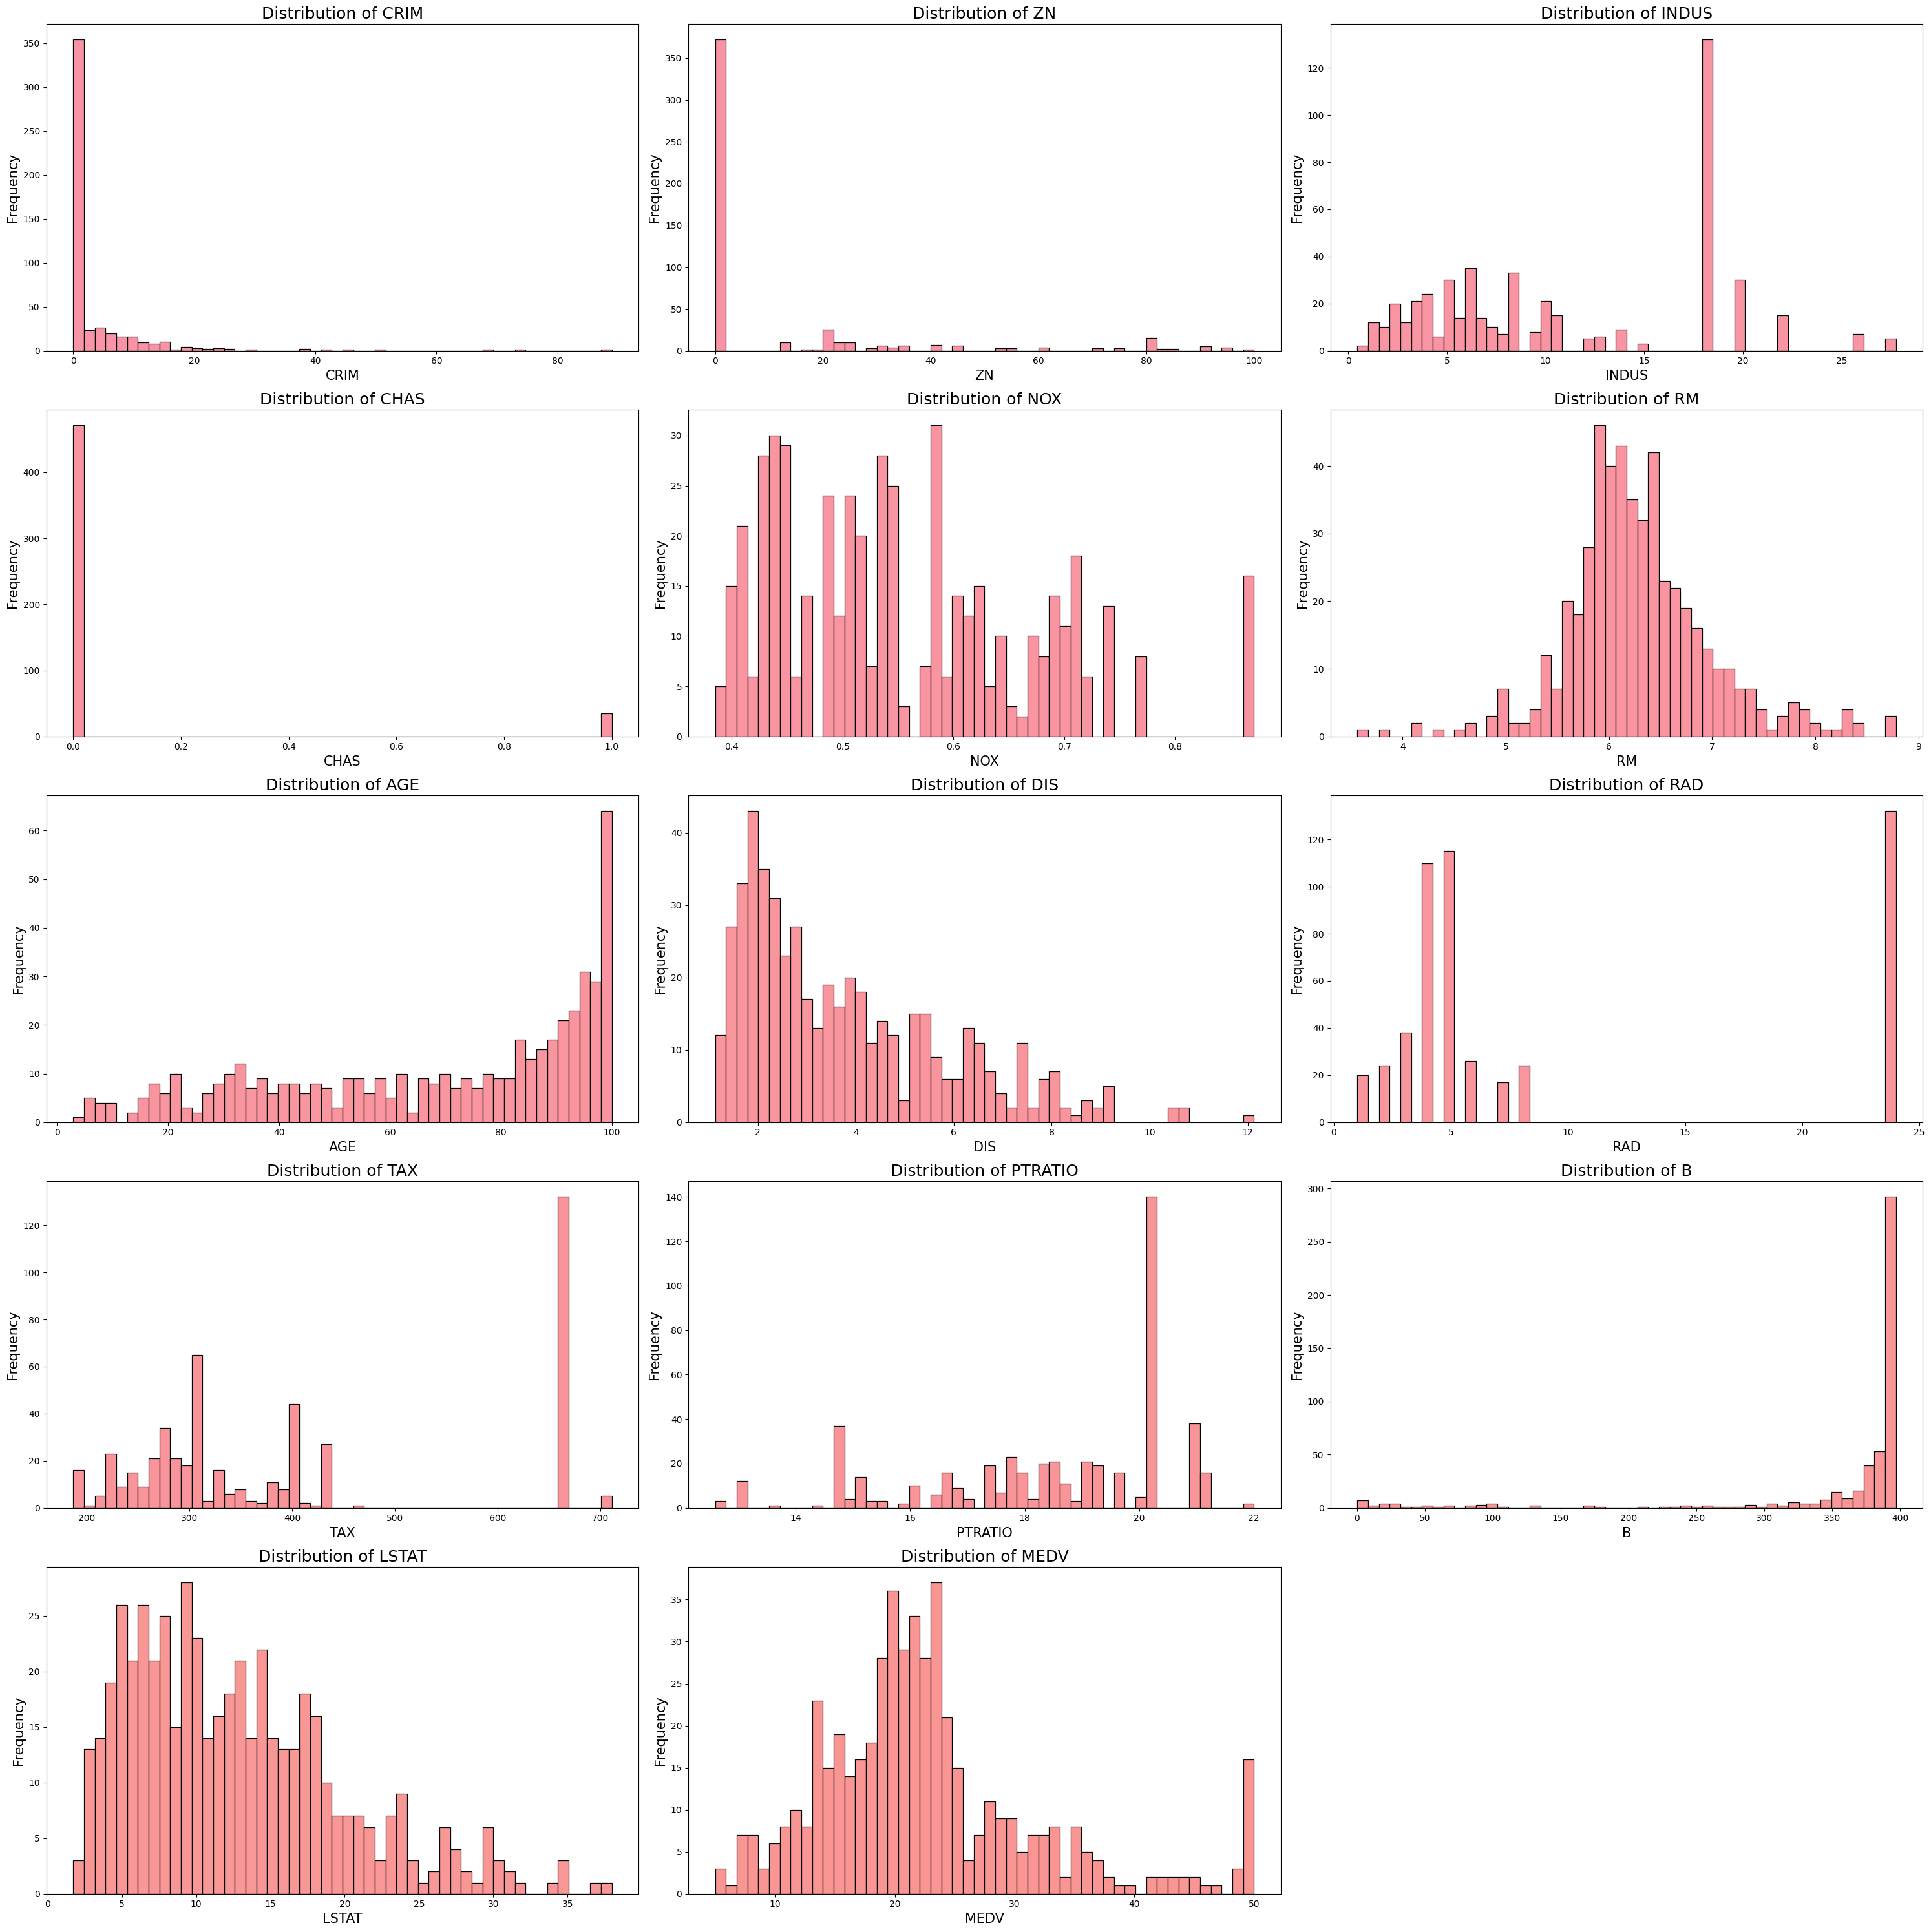

In [13]:
# Visualizing data distribution through histograms
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn-v0_8-bright')

# Creating a color palette
colors = sns.color_palette('husl', len(housingdata))

# Creating histograms
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(30, 30))  # Adjust the number of rows and columns based on data
axes = axes.flatten()

for i, col in enumerate(housingdata):
    sns.histplot(housingdata[col], bins=50, ax=axes[i], color=colors[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=18)
    axes[i].set_xlabel(col, fontsize=15)
    axes[i].set_ylabel('Frequency', fontsize=15)

# Removing any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjusting layout
plt.tight_layout()
plt.show()


### Observations:

**Highly Skewed Distributions:**
- **CRIM (per capita crime rate by town)**: The distribution is highly skewed to the right, indicating most towns have a low crime rate, with a few towns having very high crime rates.
- **ZN (proportion of residential land zoned for lots over 25,000 sq.ft.)**: The distribution is also highly skewed to the right, suggesting most areas have little to no land zoned for large lots.
- **B (1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town)**: This variable also shows a highly skewed distribution, with most values concentrated at one end of the scale.

**Normal Distribution:**
- **MEDV (Median value of owner-occupied homes in $1000s)**: The distribution of MEDV appears to be roughly normal, indicating the median home values are symmetrically distributed around the mean. This is important for predicting home prices as normal distributions are easier to model.

**Other Distributions:**
- Many other columns, such as **RM** (average number of rooms per dwelling) and **AGE** (proportion of owner-occupied units built prior to 1940), appear to have normal or bimodal distributions.
- **CHAS (Charles River dummy variable)**: This is a discrete variable with only two possible values (0 or 1), so its histogram shows two distinct bars representing these categories.

### IDENTIFYING CORRELATIONS

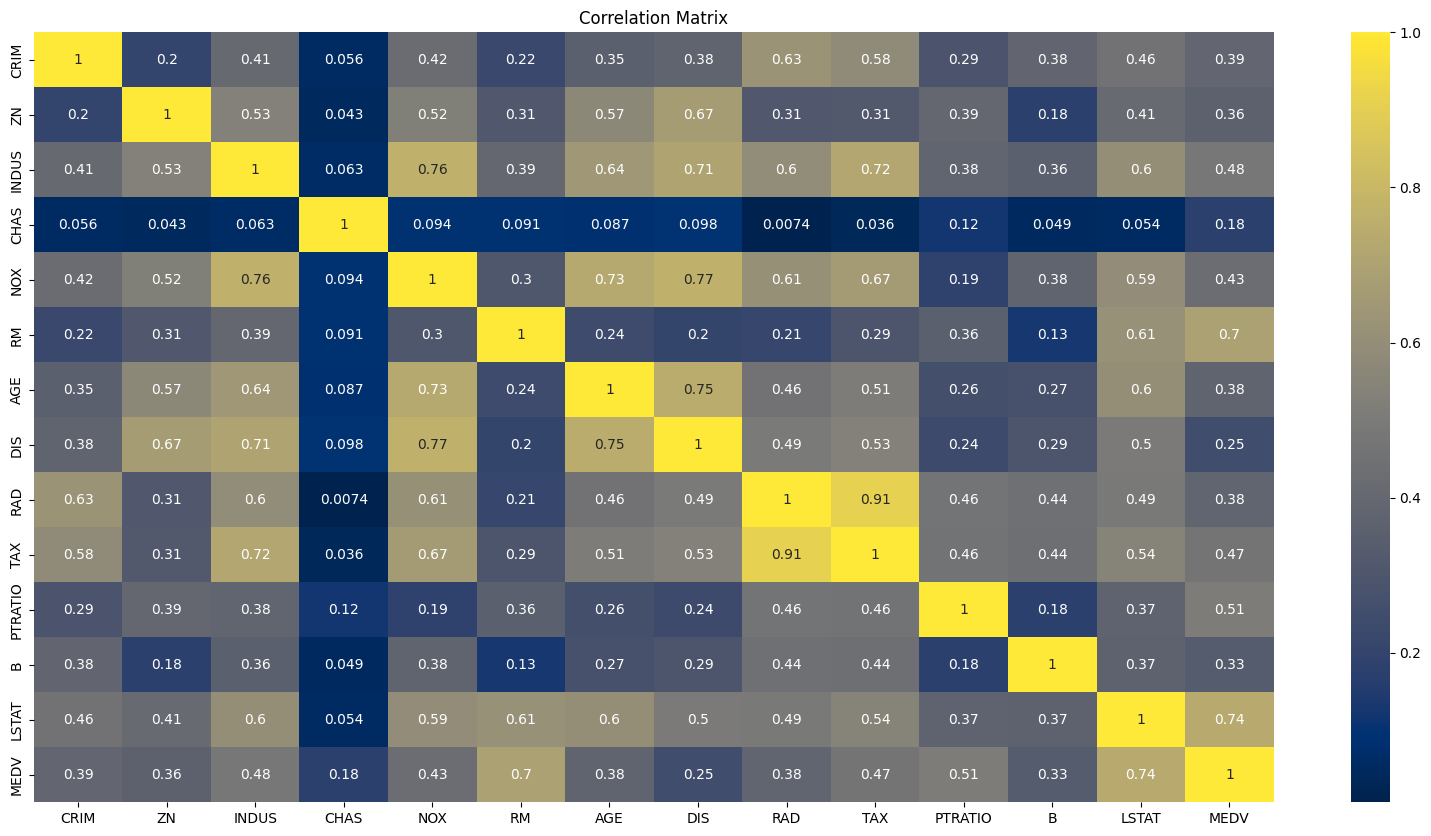

In [14]:
correlations = housingdata.corr() #creating correlation columns
plt.figure(figsize=(20, 10))
sns.heatmap(correlations.abs(),  annot=True, cmap='cividis')
plt.title('Correlation Matrix')
plt.show()


## Observations
Through Correlation Co-efficients, It has been observed that

1-MEDV(Price of House) has a strong positive correlation with RM(Average no.of rooms) having correlation score of 0.695375.

2-MEDV(Price of House) has a strong negative correlation with LSTAT(% lower status of the population) having correlation score of -0.737663.

3-MEDV(Price of House) is negatively correlated with CRIM(crime rate by town) having correlation score of -0.388305.

4-MEDV(Price of House) is negatively correlated with PTRATIO(pupil-teacher ratio by town) having correlation score of -0.507787.

5-TAX(full-value property-tax rate per $10,000) and RAD(index of accessibility to radial highways) are highly correlated features having correlation score of 0.91. 


### VISUALIZING CORRELATIONS

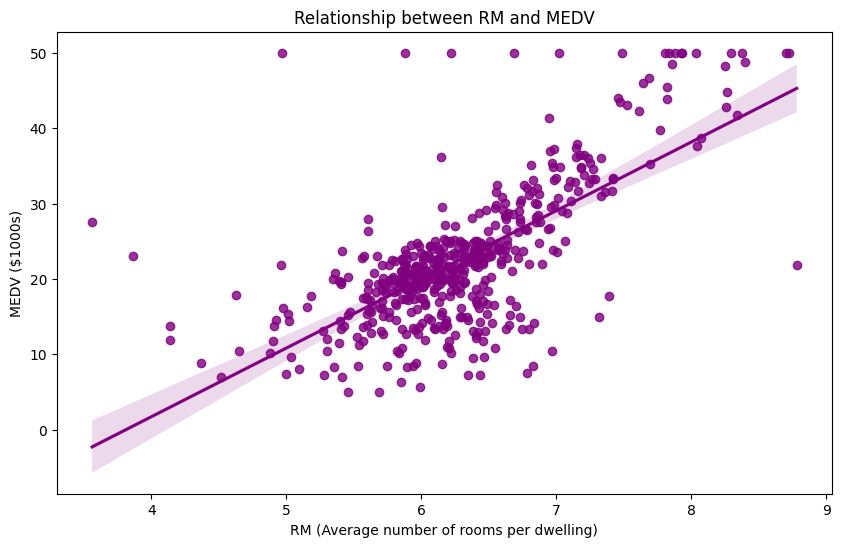

In [15]:
#1-MEDV(Price of House) increases as RM(Average no.of rooms) increases.
plt.figure(figsize=(10, 6))
sns.regplot(x='RM', y='MEDV', data=housingdata, color='purple')
plt.title('Relationship between RM and MEDV')
plt.xlabel('RM (Average number of rooms per dwelling)')
plt.ylabel('MEDV ($1000s)')
plt.show()

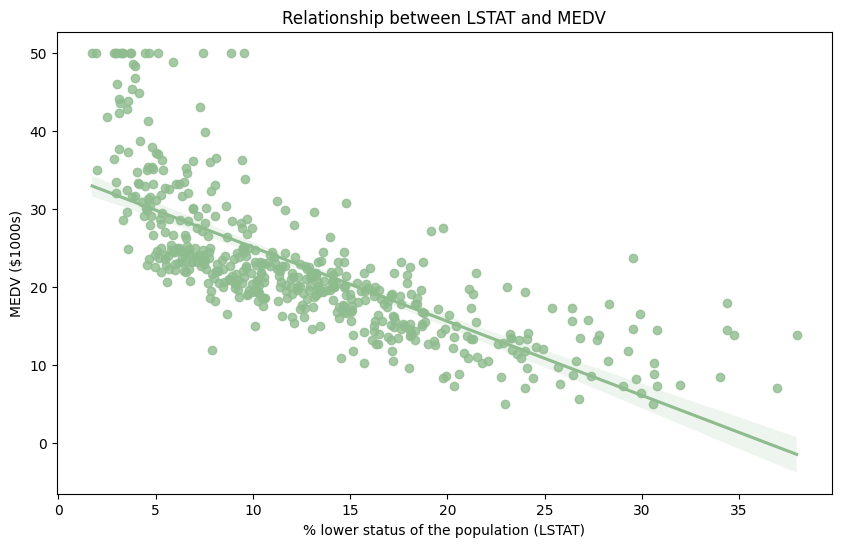

In [16]:
#2-MEDV(Price of House) decreases as LSTAT(percentage of lower status population) increases.
plt.figure(figsize=(10, 6))
sns.regplot(x='LSTAT', y='MEDV', data=housingdata, color='darkseagreen', scatter_kws={'alpha':0.8})
plt.title('Relationship between LSTAT and MEDV')
plt.xlabel('% lower status of the population (LSTAT)')
plt.ylabel('MEDV ($1000s)')
plt.show()

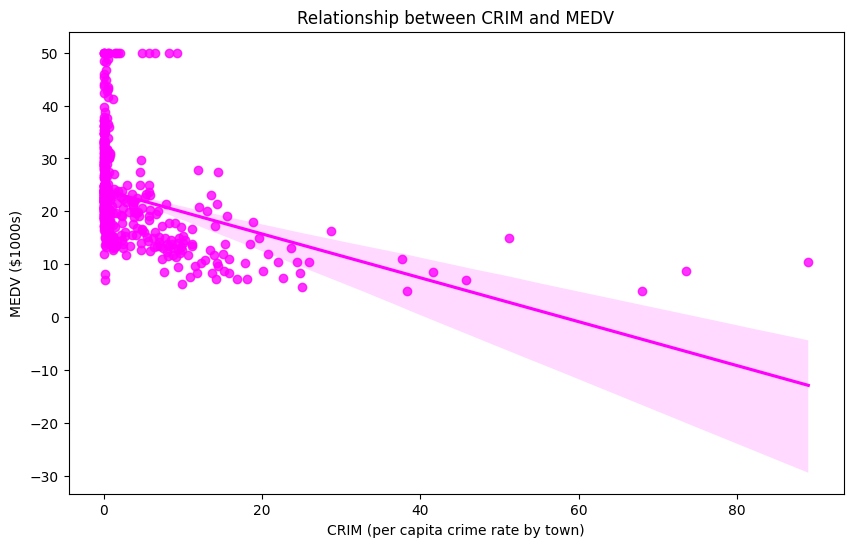

In [17]:
#3-MEDV(Price of House) is decreases as CRIM(Crime Rate by town) increases.
plt.figure(figsize=(10, 6))

sns.regplot(x='CRIM', y='MEDV', data=housingdata, color= 'magenta')                  

plt.title('Relationship between CRIM and MEDV')
plt.xlabel('CRIM (per capita crime rate by town)')
plt.ylabel('MEDV ($1000s)')
plt.show()

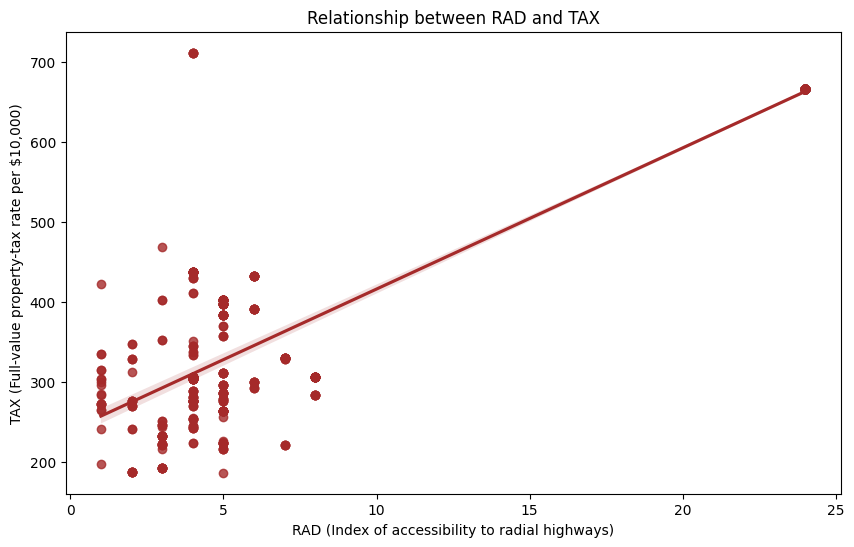

In [18]:
#5-TAX(full-value property-tax rate per $10,000) and RAD(index of accessibility to radial highways) are highly correlated features having correlation score of 0.91
plt.figure(figsize=(10, 6))

sns.regplot(x='RAD', y='TAX', data=housingdata, color='brown')

plt.title('Relationship between RAD and TAX')
plt.xlabel('RAD (Index of accessibility to radial highways)')
plt.ylabel('TAX (Full-value property-tax rate per $10,000)')

plt.show()

### FEATURE ENGINEERING

In [19]:
housingdata["TAXRATIO"] = housingdata['TAX']/housingdata['RM'] #Creating a new atrribute

In [20]:
housingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
 14  TAXRATIO  506 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB


<Axes: xlabel='TAXRATIO', ylabel='MEDV'>

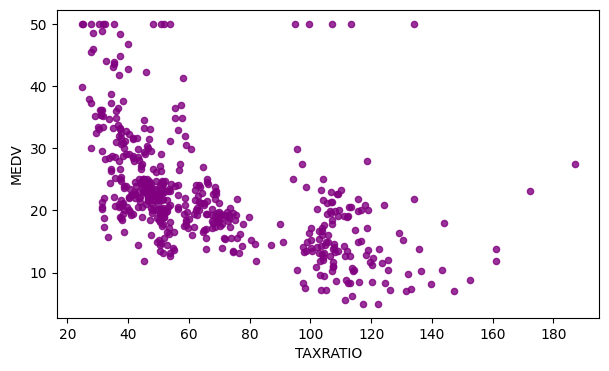

In [21]:
housingdata.plot(kind="scatter", x="TAXRATIO", y="MEDV", alpha=0.8,figsize=(7, 4),color='purple') #plotting correlation with the new attribute

In [22]:
#MEDV is negatively correlated with the new attribute TAXRATIO

In [23]:
housingdata.shape

(506, 15)

In [24]:
correlations = housingdata.corr()
correlations['MEDV'].sort_values(ascending=False) #Finding correlation co-efficient of price with other attributes in the data

MEDV        1.000000
RM          0.695375
ZN          0.360445
B           0.332616
DIS         0.251592
CHAS        0.175260
AGE        -0.376955
RAD        -0.381626
CRIM       -0.388305
NOX        -0.427927
TAX        -0.468536
INDUS      -0.483725
PTRATIO    -0.507787
TAXRATIO   -0.537589
LSTAT      -0.737663
Name: MEDV, dtype: float64

### TRAIN TEST SPLITTING

In [25]:
#Splitting data into train-test datasets
from sklearn.model_selection import StratifiedShuffleSplit
#housingdata.reset_index(drop=True, inplace=True)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housingdata, housingdata['CHAS']):
    strat_train_set = housingdata.loc[train_index]
    strat_test_set = housingdata.loc[test_index]
(f"Entries in train set: {len(strat_train_set)}  Entries in test set: {len(strat_test_set)}")

'Entries in train set: 404  Entries in test set: 102'

In [26]:
housingdata['CHAS'].value_counts()             #Categorical variable value count 

CHAS
0    471
1     35
Name: count, dtype: int64

In [27]:
strat_train_set['CHAS'].value_counts()  #Categorical variable split to avoid overfitting

CHAS
0    376
1     28
Name: count, dtype: int64

In [28]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [29]:
housingdatatrain = strat_train_set.copy()
housingdatatrain = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()
housingdatatest = strat_test_set.copy()
housingdatatest = strat_test_set.drop("MEDV", axis=1)
housing_labels2 = strat_test_set["MEDV"].copy()

### FEATURE SCALING

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housingdatatrain_np= scaler.fit_transform(housingdatatrain)
housingdatatest_np= scaler.fit_transform(housingdatatest)


In [31]:
housingdatatrain_np.shape


(404, 14)

In [32]:
housingdatatest_np.shape

(102, 14)

### MODEL BUILDING

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model1 = LinearRegression()
#model2 = DecisionTreeRegressor()
#model3 = RandomForestRegressor()

### LINEAR REGRESSION MODEL

In [34]:
model1 = LinearRegression()
model1.fit(housingdatatrain_np, housing_labels)
#predictdata = housingdatatrain.iloc[:10]
#redict_np= scaler.fit_transform(predictdata)
linear_predictions = model1.predict(housingdatatest_np)
print("Predicted Values by Linear Regressor Model\n", linear_predictions)

Predicted Values by Linear Regressor Model
 [22.34880861 14.87183689 28.78821236 29.76874839  5.67574176 12.65650352
 14.5781777  16.09097995 31.92711276 41.93902791 14.66612049 11.01059032
 21.02343635 19.11237199 18.0989946  12.95176064 31.68338855 12.16440265
 24.88565504 22.13344185 20.62114599 14.90809791 12.60609799 22.6887078
 17.99319706 32.48212129 17.46209646 33.57648576  9.05400312 34.74889131
 18.31560347 20.86971151 26.88196143 13.75825769 24.71213064 16.82769434
 38.32310455 24.23772725 22.7014794  39.08616531 24.92361953 34.648238
 22.13549743 22.22692708 16.18957444 33.07229511 45.18313187 19.49089138
 17.68048945 15.72005376 19.26498923  9.94169598 16.49513508 19.05824928
 28.69275673 35.34628203 48.39144624 30.07728253 13.75790092 18.56928868
 43.74008068 15.80034322 15.06693028 24.52317456 17.59919402 35.41253709
 20.61574894 19.10310795 18.92104291 34.83952486 31.76066815 25.8964742
 21.5895557  20.9124659  36.23247672 11.92130386 14.4346609  19.11446042
 19.7214740

In [35]:
actualvalues = housing_labels2
print("Actual Values;", actualvalues)

Actual Values; 342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64


In [36]:
#Without python package
import numpy as np
class LinearRegression:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        # Add a bias term (column of ones) to the input features
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add x0 = 1 to each instance
        # Calculate the parameters using the Normal Equation
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        # Add a bias term (column of ones) to the input features
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

#Training the model
modellin = LinearRegression()
modellin.fit(housingdatatrain_np, housing_labels)
#Predicting using linear regression 
predictionslinwithoutpackage = modellin.predict(housingdatatest_np)
print("Predicted Values by Linear Regressor Model Without Using Python Package\n", predictionslinwithoutpackage)

Predicted Values by Linear Regressor Model Without Using Python Package
 [22.34880861 14.87183689 28.78821236 29.76874839  5.67574176 12.65650352
 14.5781777  16.09097995 31.92711276 41.93902791 14.66612049 11.01059032
 21.02343635 19.11237199 18.0989946  12.95176064 31.68338855 12.16440265
 24.88565504 22.13344185 20.62114599 14.90809791 12.60609799 22.6887078
 17.99319706 32.48212129 17.46209646 33.57648576  9.05400312 34.74889131
 18.31560347 20.86971151 26.88196143 13.75825769 24.71213064 16.82769434
 38.32310455 24.23772725 22.7014794  39.08616531 24.92361953 34.648238
 22.13549743 22.22692708 16.18957444 33.07229511 45.18313187 19.49089138
 17.68048945 15.72005376 19.26498923  9.94169598 16.49513508 19.05824928
 28.69275673 35.34628203 48.39144624 30.07728253 13.75790092 18.56928868
 43.74008068 15.80034322 15.06693028 24.52317456 17.59919402 35.41253709
 20.61574894 19.10310795 18.92104291 34.83952486 31.76066815 25.8964742
 21.5895557  20.9124659  36.23247672 11.92130386 14.434

### DECISION TREE REGRESSOR

In [37]:
model2 =  DecisionTreeRegressor()
model2.fit(housingdatatrain_np, housing_labels)
#predictdata = housingdatatrain.iloc[:10]
#predict_np= scaler.fit_transform(predictdata)
decision_predictions= model2.predict(housingdatatest_np)
print("Predicted Values by Decision Tree Regressor\n", decision_predictions)

Predicted Values by Decision Tree Regressor
 [24.   5.6 29.  21.  15.6 15.6 15.2 19.1 29.  46.  17.8  5.  21.6 23.1
 22.5 11.3 31.2 15.6 25.  17.  23.  17.  13.1 24.  16.1 29.6 14.9 29.6
 10.2 29.  22.5 22.7 25.   5.6 21.4 15.1 50.  21.6 25.3 46.7 25.  29.8
 21.9 21.2 17.  31.2 44.8 20.6 19.1 23.1 24.5 17.8 17.  15.1 29.  31.7
 37.6 30.1 14.5 20.6 48.5  9.7 17.6 25.  13.6 43.8 19.6 23.2 17.1 29.6
 27.5 25.  24.  25.  29.  17.2 13.8 18.2 19.9 20.9 20.9 19.9 10.2 25.
 22.  22.7 14.2 21.2 20.6 21.9 17.4 24.5 10.2 26.6 16.8 31.6 18.2 28.7
 19.1 29.4 13.9 17. ]


In [38]:
actualvalues = housing_labels2
print("Actual Values;", actualvalues)

Actual Values; 342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64


In [39]:
#Without python package
# Class for the decision tree node
class DecisionTreeNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def calculate_mse(y, y_mean):
    return np.mean((y - y_mean) ** 2)

# Class for the decision tree regressor
class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        if num_samples >= self.min_samples_split and (self.max_depth is None or depth < self.max_depth):
            best_split = self._get_best_split(X, y, num_features)
            if best_split:
                left_tree = self._build_tree(*best_split["left"], depth + 1)
                right_tree = self._build_tree(*best_split["right"], depth + 1)
                return DecisionTreeNode(feature_index=best_split["feature_index"], threshold=best_split["threshold"], left=left_tree, right=right_tree)
        
        return DecisionTreeNode(value=np.mean(y))

    def _get_best_split(self, X, y, num_features):
        best_mse = float("inf")
        best_split = None
        for feature_index in range(num_features):
            feature_values = X[:, feature_index]
            thresholds = np.unique(feature_values)
            for threshold in thresholds:
                left_indices = feature_values <= threshold
                right_indices = feature_values > threshold
                if len(np.unique(left_indices)) == 1 or len(np.unique(right_indices)) == 1:
                    continue
                
                y_left, y_right = y[left_indices], y[right_indices]
                mse = self._calculate_mse(y_left, y_right)
                if mse < best_mse:
                    best_mse = mse
                    best_split = {
                        "feature_index": feature_index,
                        "threshold": threshold,
                        "left": (X[left_indices, :], y[left_indices]),
                        "right": (X[right_indices, :], y[right_indices])
                    }
        return best_split

    #def _calculate_mse(self, y_left, y_right):
        #mse_left = calculate_mse(y_left, np.mean(y_left))
        #mse_right = calculate_mse(y_right, np.mean(y_right))
        #return mse_left * len(y_left) / len(y_left + y_right) + mse_right * len(y_right) / len(y_left + y_right)

    def _calculate_mse(self, y_left, y_right):
         mse_left = calculate_mse(y_left, np.mean(y_left))
         mse_right = calculate_mse(y_right, np.mean(y_right))
    
         total_samples = len(y_left) + len(y_right)
         weight_left = len(y_left) / total_samples
         weight_right = len(y_right) / total_samples
    
         return mse_left * weight_left + mse_right * weight_right

    def predict(self, X):
        return np.array([self._predict(sample) for sample in X])

    def _predict(self, sample):
        node = self.root
        while node.value is None:
            if sample[node.feature_index] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

# Training the decision tree regressor
tree_regressor = DecisionTreeRegressor(max_depth=3)
tree_regressor.fit(housingdatatrain_np, housing_labels)

# Predicting using the decision tree regressor
predictions = tree_regressor.predict(housingdatatest_np)

### RANDOM FOREST REGRESSOR

In [40]:
model3 =  RandomForestRegressor()
housing_labels=np.array(housing_labels)
model3.fit(housingdatatrain_np, housing_labels)
#predictdata = housingdatatrain.iloc[:10]
#predict_np= scaler.fit_transform(predictdata)
random_predictions=model3.predict(housingdatatest_np)
print("Predicted Values by Random Forest Regressor using python package\n", random_predictions)

Predicted Values by Random Forest Regressor using python package
 [23.919  9.456 25.36  21.916 17.523 14.577 19.58  14.68  31.824 42.416
 19.49   9.056 26.314 31.332 20.664 11.359 32.405 14.617 23.222 16.752
 19.234 15.492 15.348 21.028 17.862 31.561 15.911 32.59   9.597 33.063
 22.992 21.204 23.062  8.58  19.596 12.614 42.473 23.733 24.427 44.847
 23.073 26.9   20.11  22.136 15.836 33.252 44.497 20.906 18.732 21.989
 21.496 14.768 19.279 14.525 24.681 34.141 42.099 28.288 17.991 21.
 47.48  10.364 19.246 23.998 14.676 38.796 19.022 17.72  18.013 34.018
 26.86  23.043 19.689 22.69  35.446 12.047 15.214 20.132 21.276 21.499
 22.488 21.812 14.326 23.392 20.979 21.687 14.11  20.7   22.187 23.387
 17.385 27.273  8.368 26.008 15.475 30.072 20.034 30.612 14.021 26.476
 18.274 17.624]


In [41]:
import numpy as np
from sklearn.preprocessing import StandardScaler

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = build_tree(X, y, max_depth=self.max_depth)

    def predict(self, X):
        return np.array([predict(self.tree, sample) for sample in X])


class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(tree_preds, axis=0)

def build_tree(X, y, max_depth=None, depth=0):
    num_samples, num_features = X.shape
    if num_samples <= 1 or (max_depth is not None and depth >= max_depth):
        return {"value": np.mean(y)}

    best_split = get_best_split(X, y)
    if not best_split:
        return {"value": np.mean(y)}

    left_subtree = build_tree(X[best_split["left_indices"]], y[best_split["left_indices"]], max_depth, depth + 1)
    right_subtree = build_tree(X[best_split["right_indices"]], y[best_split["right_indices"]], max_depth, depth + 1)
    return {
        "feature_index": best_split["feature_index"],
        "threshold": best_split["threshold"],
        "left": left_subtree,
        "right": right_subtree
    }

def get_best_split(X, y):
    best_mse = float("inf")
    best_split = {}
    num_samples, num_features = X.shape

    for feature_index in range(num_features):
        feature_values = X[:, feature_index]
        thresholds = np.unique(feature_values)

        for threshold in thresholds:
            left_indices = feature_values <= threshold
            right_indices = feature_values > threshold

            if len(np.unique(left_indices)) == 1 or len(np.unique(right_indices)) == 1:
                continue

            y_left, y_right = y[left_indices], y[right_indices]
            mse_left = calculate_mse(y_left, np.mean(y_left))
            mse_right = calculate_mse(y_right, np.mean(y_right))

            mse = mse_left * len(y_left) / len(y) + mse_right * len(y_right) / len(y)
            if mse < best_mse:
                best_mse = mse
                best_split = {
                    "feature_index": feature_index,
                    "threshold": threshold,
                    "left_indices": left_indices,
                    "right_indices": right_indices
                }

    return best_split if best_split else None

def predict(tree, X):
    if "value" in tree:
        return tree["value"]

    feature_index = tree["feature_index"]
    threshold = tree["threshold"]

    if X[feature_index] <= threshold:
        return predict(tree["left"], X)
    else:
        return predict(tree["right"], X)

# Converts housing_labels to a NumPy array if it's not already
housing_labels = np.array(housing_labels)

# Train the model with scaled data
forest = RandomForestRegressor(n_estimators=100, max_depth=5)
forest.fit(housingdatatrain_np, housing_labels)

# Scale the prediction data
#predict_data = scaler.transform(housingdata_np[:10]) 

# Predicting with the random forest regressor
predictions = forest.predict(housingdatatest_np)
print("Predicted values by Random Forest without using Python Package:", predictions)

# Comparing with actual prices
print("Actual Values",actualvalues)

Predicted values by Random Forest without using Python Package: [24.82861869 10.11690284 25.26141448 21.37966647 17.9759244  15.37758041
 18.96885408 13.76807592 31.27169437 41.24659554 17.41151728  9.65411082
 24.88621738 30.84748829 20.72979301 12.41031874 31.62407093 15.51574557
 23.64156359 17.43769386 20.07533139 15.8943044  17.20401945 20.39670186
 19.38187221 32.98973701 15.40541199 34.44935933  9.82084915 32.63784314
 21.32201356 20.359185   23.10929027  9.71120365 19.92085372 11.61537023
 40.48443942 23.18954908 23.71756212 44.89173153 21.94621135 28.02439166
 20.27065835 22.2664538  16.18454235 34.41768724 45.83403399 21.34411695
 18.18407899 23.36593828 20.19727212 15.872686   18.4232871  13.33782429
 25.13861797 36.04630691 41.75261755 28.04275427 17.89293788 22.25088418
 46.80827582 10.21874959 20.09871019 22.02181645 13.80456308 38.47620381
 19.93009713 16.20887969 17.73381555 37.2677578  24.74572148 23.10482391
 20.1090029  22.40676068 37.60272555 13.15262149 15.67395214

### MODEL EVALUATION USING CROSS VALIDATION, R^2 SCORE, RMAE, RMSE & STANDARD DEVIATION:

### LINEAR REGRESSION

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,explained_variance_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1, housingdatatrain_np, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
#linear_predictions = model1.predict(housingdatatest_np)
mse = mean_squared_error(housing_labels2, linear_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(housing_labels2, linear_predictions)
r2  = r2_score(housing_labels2, linear_predictions)
evs_linear = explained_variance_score(housing_labels2, linear_predictions)
print('Root Mean Squared Error of Linear Regression:', rmse )
print("RMSE Scores Mean through Cross Validation", rmse_scores.mean() )
print("Standard deviation: ", rmse_scores.std())
print('Mean Absolute Error of Linear Regression:', mae )
print("Explained Variance Score:", evs_linear)
print('R-squared', r2 )

Root Mean Squared Error of Linear Regression: 3.758825720656771
RMSE Scores Mean through Cross Validation 4.332964694399179
Standard deviation:  1.2221699576988387
Mean Absolute Error of Linear Regression: 2.932719839659705
Explained Variance Score: 0.800467127490941
R-squared 0.8002766379527549


### DECISION TREE REGRESSOR

In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2, housingdatatrain_np, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
mse = mean_squared_error(housing_labels2, decision_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(housing_labels2, decision_predictions)
r2  = r2_score(housing_labels2, decision_predictions)
evs_decision = explained_variance_score(housing_labels2, decision_predictions)
print('Root Mean Squared Error of Decision Tree Regressor:', rmse ) 
print("RMSE Scores Mean through Cross Validation", rmse_scores.mean() )
print("Standard deviation: ", rmse_scores.std())
print('Mean Absolute Error of Decision Tree Regressor:', mae )
print("Explained Variance Score:", evs_decision)
print('R-squared', r2 )

Root Mean Squared Error of Decision Tree Regressor: 4.211119733724595
RMSE Scores Mean through Cross Validation 4.044075551133765
Standard deviation:  0.7923351626003168
Mean Absolute Error of Decision Tree Regressor: 3.2764705882352945
Explained Variance Score: 0.750063981266872
R-squared 0.7493200105196127


### RANDOM FOREST REGRESSOR

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model3, housingdatatrain_np, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
mse = mean_squared_error(housing_labels2, random_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(housing_labels2, random_predictions)
r2  = r2_score(housing_labels2, random_predictions)
evs_random = explained_variance_score(housing_labels2, random_predictions)
print('Root Mean Squared Error of Random Forest Regressor:', rmse )
print("RMSE Scores Mean through Cross Validation", rmse_scores.mean() )
print("Standard deviation: ", rmse_scores.std())
print('Mean Absolute Error of Random Forest Regressor:', mae )
print("Explained Variance Score:", evs_random)
print('R-squared', r2 )

Root Mean Squared Error of Random Forest Regressor: 3.3339741109596255
RMSE Scores Mean through Cross Validation 3.290760173068437
Standard deviation:  0.6625984496976347
Mean Absolute Error of Random Forest Regressor: 2.503470588235294
Explained Variance Score: 0.84356189137701
R-squared 0.8428736817019337


In [45]:
# Opting for Random Forest Regressor due to its superior performance across all evaluation metrics, 
#including R-squaed, RMAE, RMSE and standard deviation, indicating robust cross-validation results.


In [46]:
from joblib import dump, load
dump(model3, 'Model.joblib') 

['Model.joblib']

### CONCLUSION

Based on the comprehensive evaluation of performance metrics across Linear Regression, Decision Tree Regressor, and Random Forest Regressor, the below findings are concluded.

- **Model Performance**:
  - **Random Forest Regressor** consistently outperforms both Linear Regression and Decision Tree Regressor across all metrics.
  - It achieves the lowest **RMSE** and **MAE**, highest **R-squared (R²)**, and demonstrates robust cross-validation performance.
   
- **Model Key Factors**:
  - **Ensemble Learning**: Random Forest leverages ensemble techniques to effectively capture complex relationships in data.
  - **Feature Importance**: Identifies 'RM' and 'LSTAT' as critical predictors of housing prices, enhancing interpretability.
   
- **Recommendations for Improvement**:
  - Further **hyperparameter tuning** and exploration of advanced **ensemble methods** could potentially enhance model performance.
  - Consideration of potential sensitivity to outliers and computational demands due to ensemble nature.

This conclusion underscores the superiority of Random Forest Regressor in predicting housing prices, highlighting its effectiveness in handling complex data patterns and informing strategic decisions in the real estate sector.